In [1]:

# Link to Dataset: https://www.kaggle.com/datasets/yasserh/titanic-dataset/data

import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = 'Titanic-Dataset.csv'

def read_csv_with_pandas(file_path):
    """
    Reads a CSV file using pandas and returns a DataFrame.
    Input:
        file_path (str): The path to the CSV file.
    Output:
        pd.DataFrame: DataFrame containing the CSV data.
    """
    df = pd.read_csv(file_path)
    return df

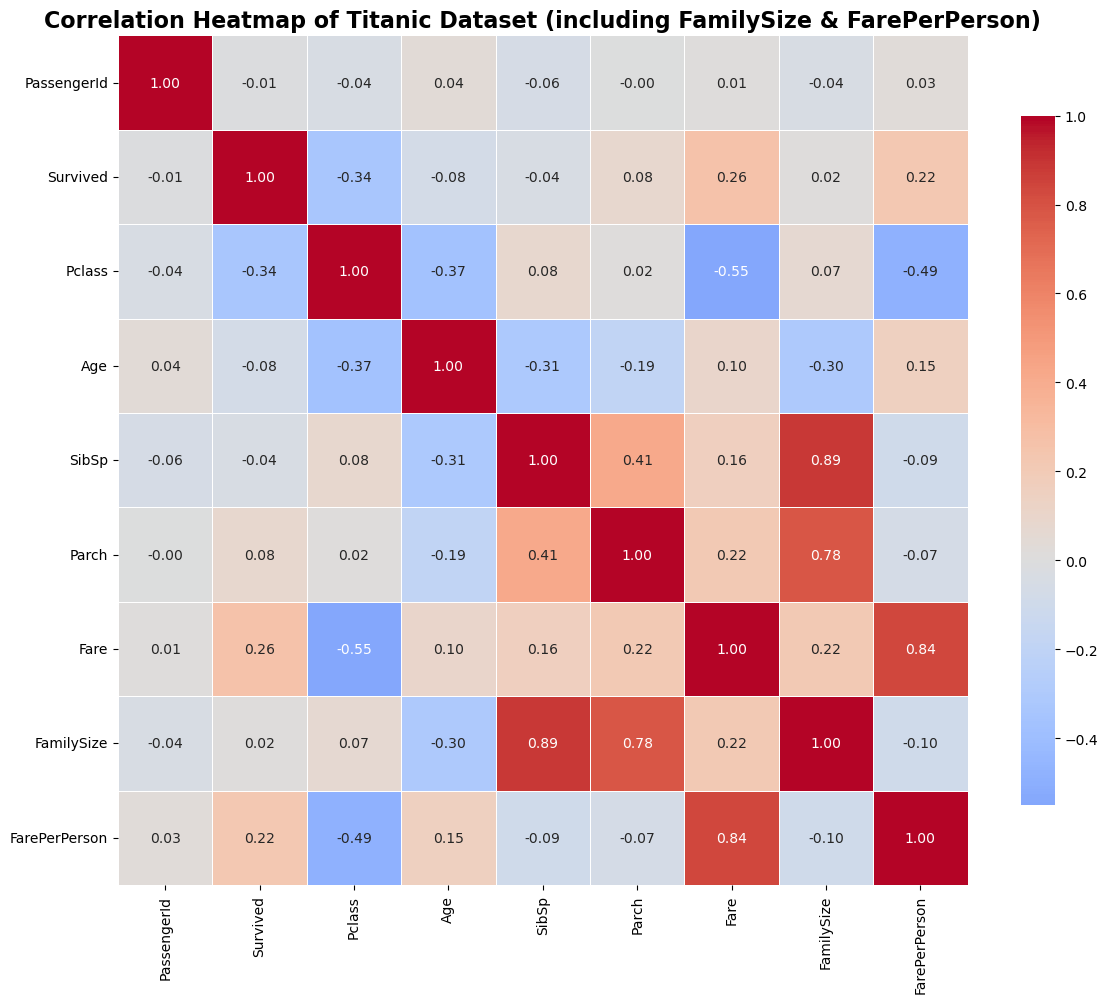


Correlation Matrix:
               PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId       1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived         -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass           -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age               0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp            -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch            -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare              0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   
FamilySize       -0.040143  0.016639  0.065997 -0.301914  0.890712  0.783111   
FarePerPerson     0.026303  0.221600 -0.485079  0.150763 -0.094682 -0.068978   

                   Fare  FamilySize  FarePerPerson  
PassengerId    0.012658   -0.040143       0.026303  
Survived       0.257307    0.016639       0.221600  
Pclass        -0.54

In [3]:
# Correlation Heatmap of Titanic Dataset
# Load the data
df = read_csv_with_pandas(file_path)

# Create additional features
# FamilySize = SibSp + Parch + 1 (self)
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
# Fare per person to account for shared fares
# Avoid divide-by-zero (FamilySize should be >=1 but guard anyway)
df['FarePerPerson'] = df['Fare'] / df['FamilySize']

# Select numeric columns for correlation (this will include the new features)
numeric_df = df.select_dtypes(include=[np.number])

# Calculate correlation matrix
correlation_matrix = numeric_df.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            fmt='.2f', square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap of Titanic Dataset (including FamilySize & FarePerPerson)', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("\nCorrelation Matrix:")
print(correlation_matrix)

# Print key correlations of interest
for a, b in [('Fare', 'Pclass'), ('FarePerPerson', 'Pclass'), ('Fare', 'FamilySize'), ('FarePerPerson', 'FamilySize'), ('Age','Survived')]:
    if a in correlation_matrix.columns and b in correlation_matrix.columns:
        print(f"Correlation {a} vs {b}: {correlation_matrix.loc[a, b]:.4f}")


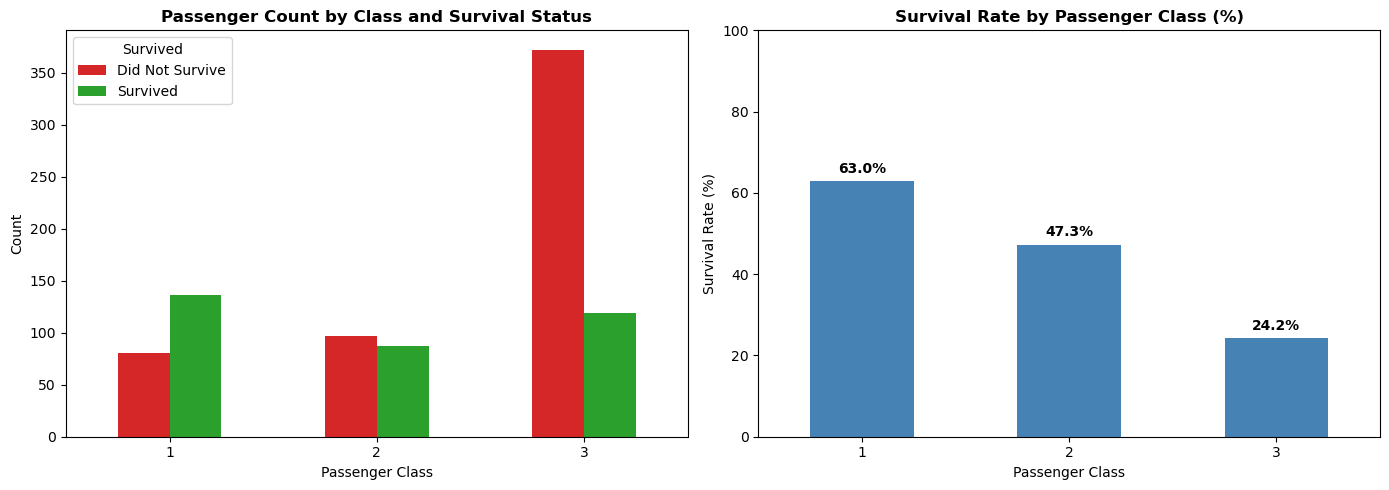

Survival Summary by Class:
Class 1: 136/216 survived (63.0%)
Class 2: 87/184 survived (47.3%)
Class 3: 119/491 survived (24.2%)


In [4]:
# Graph of Class vs Survival

# Create figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 1. Count plot: Class vs Survival
survival_by_class = df.groupby(['Pclass', 'Survived']).size().unstack()
survival_by_class.plot(kind='bar', ax=axes[0], color=['#d62728', '#2ca02c'])
axes[0].set_title('Passenger Count by Class and Survival Status', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Passenger Class')
axes[0].set_ylabel('Count')
axes[0].legend(['Did Not Survive', 'Survived'], title='Survived')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)

# 2. Survival rate by class (percentage)
survival_rate = df.groupby('Pclass')['Survived'].agg(['sum', 'count'])
survival_rate['percentage'] = (survival_rate['sum'] / survival_rate['count'] * 100)
survival_rate['percentage'].plot(kind='bar', ax=axes[1], color='steelblue')
axes[1].set_title('Survival Rate by Passenger Class (%)', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Passenger Class')
axes[1].set_ylabel('Survival Rate (%)')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)
axes[1].set_ylim([0, 100])

# Add percentage labels on bars
for i, v in enumerate(survival_rate['percentage']):
    axes[1].text(i, v + 2, f'{v:.1f}%', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

# Print summary statistics
print("Survival Summary by Class:")
print("=" * 50)
for pclass in sorted(df['Pclass'].unique()):
    class_data = df[df['Pclass'] == pclass]
    survived = class_data['Survived'].sum()
    total = len(class_data)
    percentage = (survived / total) * 100
    print(f"Class {int(pclass)}: {int(survived)}/{int(total)} survived ({percentage:.1f}%)")

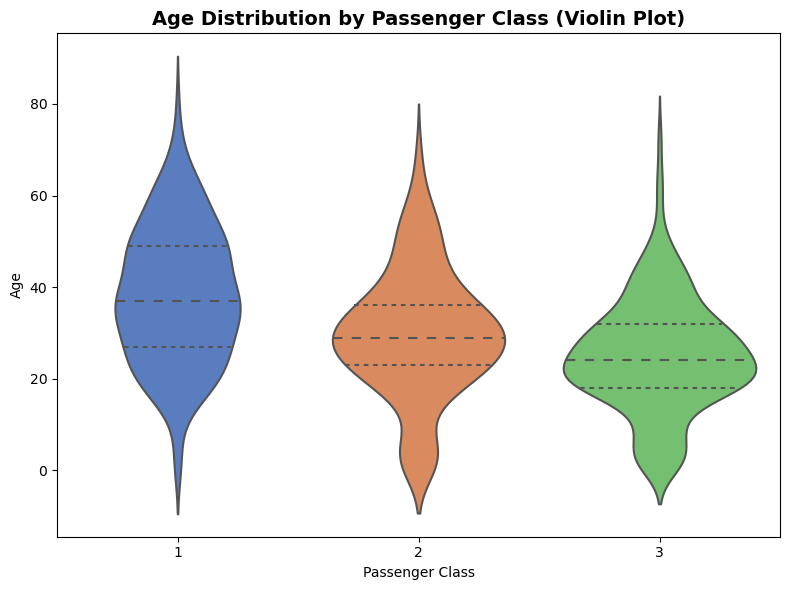

Age summary by Pclass:
        median       mean  count
Pclass                          
1         37.0  38.233441    186
2         29.0  29.877630    173
3         24.0  25.140620    355


In [5]:
# Violin plot: Age distribution by Passenger Class
# Prepare data (drop missing ages)
df_age = df[['Pclass', 'Age']].dropna()

plt.figure(figsize=(8, 6))
sns.violinplot(x='Pclass', y='Age', data=df_age, inner='quartile', palette='muted')
plt.title('Age Distribution by Passenger Class (Violin Plot)', fontsize=14, fontweight='bold')
plt.xlabel('Passenger Class')
plt.ylabel('Age')
plt.tight_layout()
plt.show()

# Print median and IQR for Age by class
summary = df_age.groupby('Pclass')['Age'].agg(['median', 'mean', 'count'])
print('Age summary by Pclass:')
print(summary)


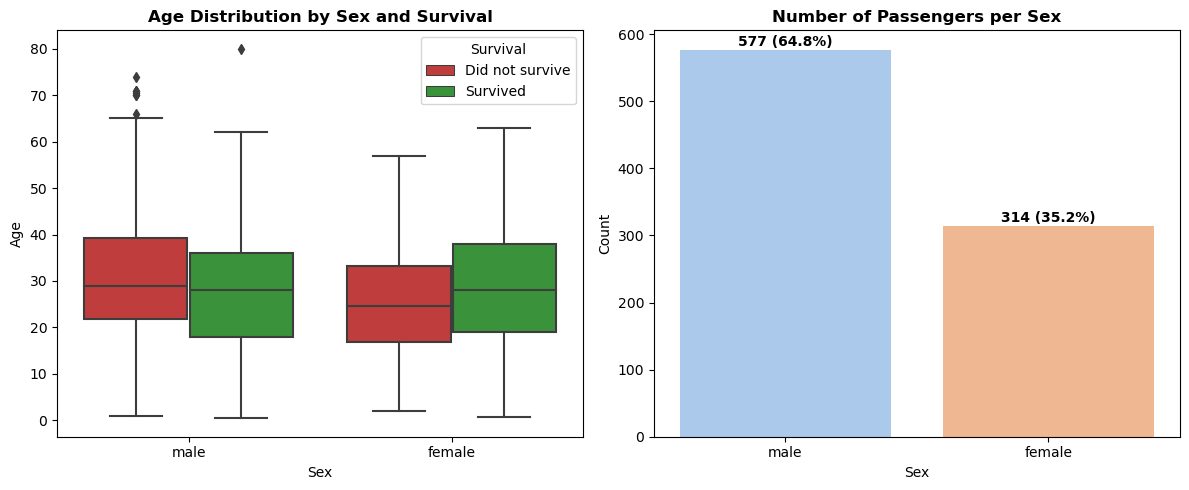

Passenger counts by Sex:
male      577
female    314
Name: Sex, dtype: int64

Survival counts by Sex:
Survived    0    1
Sex               
female     81  233
male      468  109


In [6]:
# Boxplot (Age by Sex with Survival) and Bar chart (passenger count per Sex)
# Prepare data
df_box = df[['Sex', 'Age', 'Survived']].copy()
df_box = df_box.dropna(subset=['Age', 'Sex'])

def survived_label(x):
    return 'Survived' if x == 1 else 'Did not survive'

df_box['SurvivedLabel'] = df_box['Survived'].apply(survived_label)

plt.figure(figsize=(12, 5))

# 1) Boxplot: Age distribution by Sex with Survival hue
plt.subplot(1, 2, 1)
sns.boxplot(x='Sex', y='Age', hue='SurvivedLabel', data=df_box, palette=['#d62728', '#2ca02c'])
plt.title('Age Distribution by Sex and Survival', fontsize=12, fontweight='bold')
plt.xlabel('Sex')
plt.ylabel('Age')
plt.legend(title='Survival', loc='upper right')

# 2) Bar chart: number of passengers per Sex
plt.subplot(1, 2, 2)
sex_counts = df['Sex'].value_counts().loc[['male','female']] if set(['male','female']).issubset(df['Sex'].unique()) else df['Sex'].value_counts()
sns.barplot(x=sex_counts.index, y=sex_counts.values, palette='pastel')
plt.title('Number of Passengers per Sex', fontsize=12, fontweight='bold')
plt.xlabel('Sex')
plt.ylabel('Count')

# Annotate bars with counts and percentages
total = sex_counts.sum()
for i, v in enumerate(sex_counts.values):
    pct = v / total * 100
    plt.text(i, v + max(sex_counts.values) * 0.01, f'{v} ({pct:.1f}%)', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

# Print summary
print('Passenger counts by Sex:')
print(sex_counts)
print('\nSurvival counts by Sex:')
print(df.groupby('Sex')['Survived'].value_counts().unstack(fill_value=0))


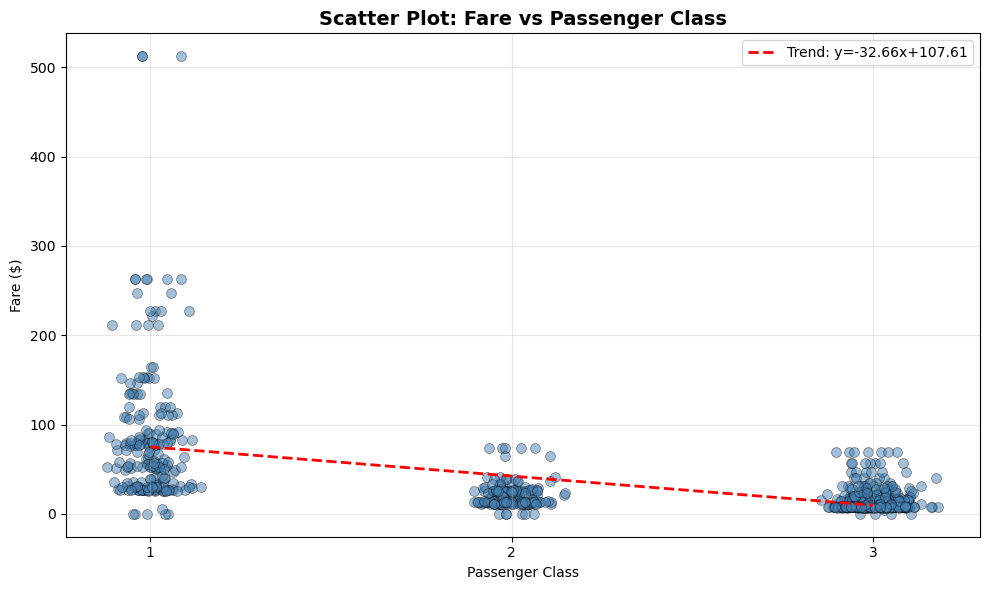

Correlation between Pclass and Fare: -0.5495

Fare statistics by Pclass:
        count       mean        std  min       25%      50%   75%       max
Pclass                                                                     
1       216.0  84.154687  78.380373  0.0  30.92395  60.2875  93.5  512.3292
2       184.0  20.662183  13.417399  0.0  13.00000  14.2500  26.0   73.5000
3       491.0  13.675550  11.778142  0.0   7.75000   8.0500  15.5   69.5500


In [7]:
# Scatter plot: Correlation between Fare and Pclass
# Prepare data
df_scatter = df[['Pclass', 'Fare']].dropna()

plt.figure(figsize=(10, 6))
# Add jitter to Pclass for better visibility
jitter_strength = 0.05
pclass_jittered = df_scatter['Pclass'] + np.random.normal(0, jitter_strength, size=len(df_scatter))

plt.scatter(pclass_jittered, df_scatter['Fare'], alpha=0.5, s=50, color='steelblue', edgecolors='black', linewidth=0.5)

# Add trend line
z = np.polyfit(df_scatter['Pclass'], df_scatter['Fare'], 1)
p = np.poly1d(z)
x_line = np.linspace(df_scatter['Pclass'].min(), df_scatter['Pclass'].max(), 100)
plt.plot(x_line, p(x_line), 'r--', linewidth=2, label=f'Trend: y={z[0]:.2f}x+{z[1]:.2f}')

plt.title('Scatter Plot: Fare vs Passenger Class', fontsize=14, fontweight='bold')
plt.xlabel('Passenger Class')
plt.ylabel('Fare ($)')
plt.xticks([1, 2, 3])
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Print correlation statistics
correlation = df_scatter['Pclass'].corr(df_scatter['Fare'])
print(f'Correlation between Pclass and Fare: {correlation:.4f}')
print(f'\nFare statistics by Pclass:')
print(df_scatter.groupby('Pclass')['Fare'].describe())


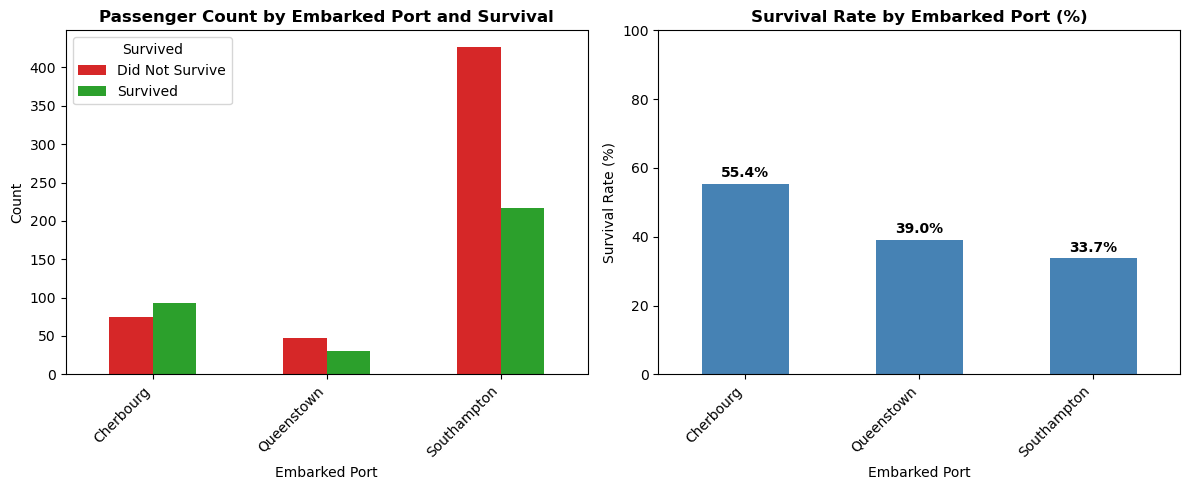

Survival Summary by Embarked Port:
Cherbourg: 93/168 survived (55.4%)
Queenstown: 30/77 survived (39.0%)
Southampton: 217/644 survived (33.7%)


In [8]:
# Bar graph: Embarked port vs Survival
# Prepare data (drop rows with missing Embarked values)
df_embarked = df[['Embarked', 'Survived']].dropna()

# Map port codes to port names for better readability
port_names = {
    'C': 'Cherbourg',
    'Q': 'Queenstown', 
    'S': 'Southampton'
}
df_embarked['Port'] = df_embarked['Embarked'].map(port_names)

plt.figure(figsize=(12, 5))

# 1) Count plot: Embarked vs Survival
plt.subplot(1, 2, 1)
survival_by_port = df_embarked.groupby(['Port', 'Survived']).size().unstack()
survival_by_port.plot(kind='bar', ax=plt.gca(), color=['#d62728', '#2ca02c'])
plt.title('Passenger Count by Embarked Port and Survival', fontsize=12, fontweight='bold')
plt.xlabel('Embarked Port')
plt.ylabel('Count')
plt.legend(['Did Not Survive', 'Survived'], title='Survived')
plt.xticks(rotation=45, ha='right')

# 2) Survival rate by port (percentage)
plt.subplot(1, 2, 2)
survival_rate_port = df_embarked.groupby('Port')['Survived'].agg(['sum', 'count'])
survival_rate_port['percentage'] = (survival_rate_port['sum'] / survival_rate_port['count'] * 100)
survival_rate_port['percentage'].plot(kind='bar', ax=plt.gca(), color='steelblue')
plt.title('Survival Rate by Embarked Port (%)', fontsize=12, fontweight='bold')
plt.xlabel('Embarked Port')
plt.ylabel('Survival Rate (%)')
plt.xticks(rotation=45, ha='right')
plt.ylim([0, 100])

# Add percentage labels on bars
for i, v in enumerate(survival_rate_port['percentage']):
    plt.text(i, v + 2, f'{v:.1f}%', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

# Print summary statistics
print('Survival Summary by Embarked Port:')
print('=' * 50)
for port in sorted(df_embarked['Port'].unique()):
    port_data = df_embarked[df_embarked['Port'] == port]
    survived = port_data['Survived'].sum()
    total = len(port_data)
    percentage = (survived / total) * 100
    print(f'{port}: {int(survived)}/{int(total)} survived ({percentage:.1f}%)')


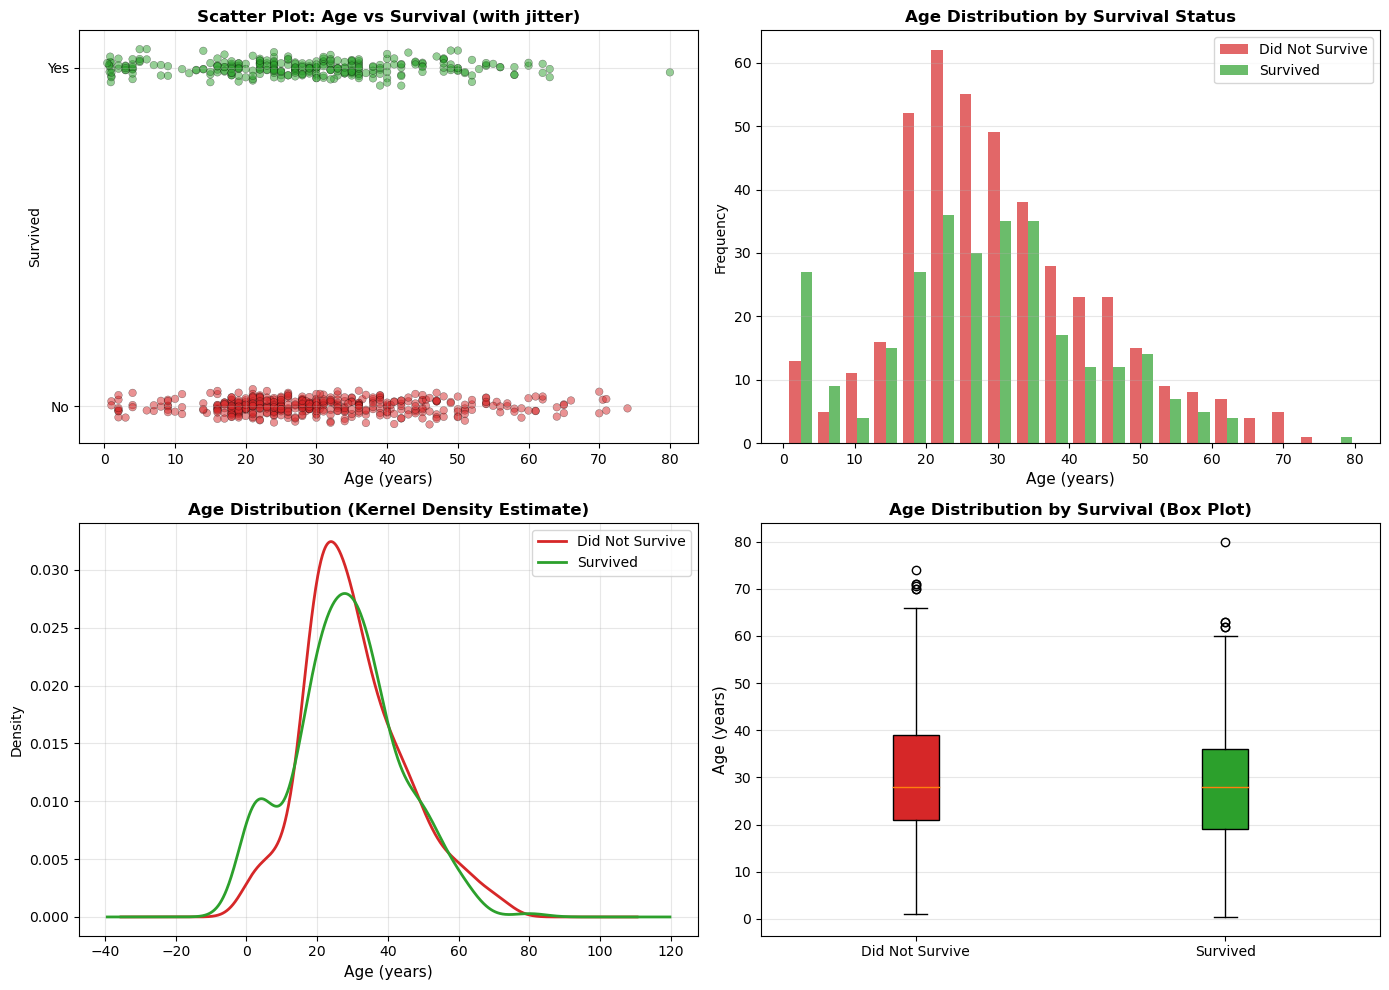

Age Statistics by Survival Status:

Did Not Survive:
count    424.000000
mean      30.626179
std       14.172110
min        1.000000
25%       21.000000
50%       28.000000
75%       39.000000
max       74.000000
Name: Age, dtype: float64

Survived:
count    290.000000
mean      28.343690
std       14.950952
min        0.420000
25%       19.000000
50%       28.000000
75%       36.000000
max       80.000000
Name: Age, dtype: float64

Correlation between Age and Survival: -0.0772


In [9]:
# Age vs Survival Analysis
# Prepare data (drop missing ages)
df_age_survival = df[['Age', 'Survived']].dropna()

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1) Scatter plot: Age vs Survival with jitter
ax1 = axes[0, 0]
# Add jitter to Survived for better visibility
jitter = np.random.normal(0, 0.02, size=len(df_age_survival))
survived_jittered = df_age_survival['Survived'].values + jitter
colors = ['#d62728' if x == 0 else '#2ca02c' for x in df_age_survival['Survived'].values]
ax1.scatter(df_age_survival['Age'], survived_jittered, alpha=0.5, c=colors, s=30, edgecolors='black', linewidth=0.3)
ax1.set_xlabel('Age (years)', fontsize=11)
ax1.set_ylabel('Survived')
ax1.set_yticks([0, 1])
ax1.set_yticklabels(['No', 'Yes'])
ax1.set_title('Scatter Plot: Age vs Survival (with jitter)', fontsize=12, fontweight='bold')
ax1.grid(alpha=0.3)

# 2) Histogram: Age distribution by survival
ax2 = axes[0, 1]
survived_ages = df_age_survival[df_age_survival['Survived'] == 1]['Age']
not_survived_ages = df_age_survival[df_age_survival['Survived'] == 0]['Age']
ax2.hist([not_survived_ages, survived_ages], bins=20, label=['Did Not Survive', 'Survived'], color=['#d62728', '#2ca02c'], alpha=0.7)
ax2.set_xlabel('Age (years)', fontsize=11)
ax2.set_ylabel('Frequency')
ax2.set_title('Age Distribution by Survival Status', fontsize=12, fontweight='bold')
ax2.legend()
ax2.grid(alpha=0.3, axis='y')

# 3) KDE plot: Density comparison
ax3 = axes[1, 0]
not_survived_ages.plot.kde(ax=ax3, color='#d62728', linewidth=2, label='Did Not Survive')
survived_ages.plot.kde(ax=ax3, color='#2ca02c', linewidth=2, label='Survived')
ax3.set_xlabel('Age (years)', fontsize=11)
ax3.set_ylabel('Density')
ax3.set_title('Age Distribution (Kernel Density Estimate)', fontsize=12, fontweight='bold')
ax3.legend()
ax3.grid(alpha=0.3)

# 4) Box plot: Age by survival
ax4 = axes[1, 1]
df_age_survival_copy = df_age_survival.copy()
df_age_survival_copy['Survival_Label'] = df_age_survival_copy['Survived'].apply(lambda x: 'Survived' if x == 1 else 'Did Not Survive')
bp = ax4.boxplot([not_survived_ages, survived_ages], labels=['Did Not Survive', 'Survived'], patch_artist=True)
bp['boxes'][0].set_facecolor('#d62728')
bp['boxes'][1].set_facecolor('#2ca02c')
ax4.set_ylabel('Age (years)', fontsize=11)
ax4.set_title('Age Distribution by Survival (Box Plot)', fontsize=12, fontweight='bold')
ax4.grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Print statistics
print("Age Statistics by Survival Status:")
print("=" * 60)
print("\nDid Not Survive:")
print(not_survived_ages.describe())
print("\nSurvived:")
print(survived_ages.describe())

# Calculate correlation between age and survival
age_survival_corr = df_age_survival['Age'].corr(df_age_survival['Survived'])
print(f"\nCorrelation between Age and Survival: {age_survival_corr:.4f}")


In [ ]:
# Additional analysis: FamilySize and FarePerPerson
# Ensure features exist
if 'FamilySize' not in df.columns:
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
if 'FarePerPerson' not in df.columns:
    # Guard against division by zero
    df['FarePerPerson'] = df['Fare'] / df['FamilySize'].replace(0, 1)

print('New columns added: FamilySize, FarePerPerson')

# Head and descriptive stats
print('\nSample rows:')
print(df[['Name','Pclass','Sex','Age','SibSp','Parch','FamilySize','Fare','FarePerPerson','Survived']].head(10))

print('\nDescriptive statistics for FamilySize and FarePerPerson:')
print(df[['FamilySize','FarePerPerson']].describe())

# Correlations involving new features
corr = df.select_dtypes(include=[np.number]).corr()
print('\nKey correlations:')
for a, b in [('FarePerPerson','Pclass'), ('FarePerPerson','FamilySize'), ('FamilySize','Survived'), ('FarePerPerson','Survived'), ('Fare','FamilySize')]:
    if a in corr.columns and b in corr.columns:
        print(f'  {a} vs {b}: {corr.loc[a,b]:.4f}')

# Grouped analysis
print('\nAverage Fare and FarePerPerson by Survival:')
print(df.groupby('Survived')[['Fare','FarePerPerson','FamilySize']].agg(['mean','median','count']))

print('\nAverage FarePerPerson and FamilySize by Pclass and Survived:')
print(df.groupby(['Pclass','Survived'])[['FarePerPerson','FamilySize']].mean())

# Top families by FamilySize
print('\nTop passengers by FamilySize:')
print(df.sort_values('FamilySize', ascending=False)[['Name','FamilySize','Pclass','Fare','Survived']].head(10))

# Visualizations
plt.figure(figsize=(14, 10))

# 1. Histogram of FarePerPerson (log-scaled for skew)
plt.subplot(2,2,1)
plt.hist(df['FarePerPerson'].dropna(), bins=40, color='steelblue', alpha=0.8)
plt.xlabel('Fare Per Person')
plt.title('Distribution of FarePerPerson')
plt.grid(alpha=0.3)

# 2. Boxplot FarePerPerson by Pclass
plt.subplot(2,2,2)
sns.boxplot(x='Pclass', y='FarePerPerson', data=df, palette='Set2')
plt.yscale('symlog')
plt.title('FarePerPerson by Pclass (symlog scale)')
plt.ylabel('Fare Per Person (symlog)')

# 3. Scatter: FamilySize vs FarePerPerson (colored by Survived)
plt.subplot(2,2,3)
colors = df['Survived'].map({0:'#d62728', 1:'#2ca02c'})
plt.scatter(df['FamilySize'], df['FarePerPerson'], c=colors, alpha=0.6, edgecolors='k', linewidth=0.2)
plt.xlabel('FamilySize')
plt.ylabel('Fare Per Person')
plt.title('FamilySize vs FarePerPerson (colored by Survived)')
plt.grid(alpha=0.3)

# 4. Bar: average Survival rate by FamilySize (small families vs large families)
plt.subplot(2,2,4)
family_survival = df.groupby('FamilySize')['Survived'].mean()
family_counts = df['FamilySize'].value_counts().sort_index()
# Only plot family sizes with at least 10 occurrences
mask = family_counts >= 10
plt.bar(family_survival[mask].index, family_survival[mask].values, color='mediumpurple')
plt.xlabel('FamilySize')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by FamilySize (only sizes with >=10 passengers)')
plt.ylim(0,1)
plt.grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Save figures for later review
plt.figure(figsize=(6,4))
sns.boxplot(x='Pclass', y='FarePerPerson', data=df, palette='Set2')
plt.yscale('symlog')
plt.title('FarePerPerson by Pclass (saved)')
plt.tight_layout()
plt.savefig('fareperperson_by_pclass.png')
plt.close()

# Final insights printed
print('\nInsights:')
print('- Family sizes vary; many passengers are single (FamilySize=1).')
print('- FarePerPerson is skewed; using log or symlog scale helps visualization.')
print('- Higher classes generally have higher FarePerPerson; family size also affects per-person fare.')
print('- Survival rate changes with FamilySize; small families/singles and very large families have different survival patterns — inspect the bar chart to see details.')
print('\nSaved: fareperperson_by_pclass.png')
